## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousemerge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mousemerge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Checking to see what the data looks like
#mousemerge["Mouse ID"].unique() #no anomalies spotted
#mousemerge["Drug Regimen"].unique() #no anomalies spotted
#mousemerge["Sex"].unique() #no anomalies spotted
#mousemerge["Age_months"].unique() #no anomalies spotted
#mousemerge["Weight (g)"].unique() #no anomalies spotted
#mousemerge["Timepoint"].unique() #no anomalies spotted
#mousemerge["Tumor Volume (mm3)"].unique() #no anomalies spotted
#mousemerge["Metastatic Sites"].unique() #no anomalies spotted

In [3]:
# Checking the number of mice.
[mouse_metadata["Mouse ID"].count(), mousemerge["Mouse ID"].nunique()]
print(f"The number of mice is {mousemerge['Mouse ID'].nunique()}.")

The number of mice is 249.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint

dupmouse = mousemerge[["Mouse ID","Timepoint"]].loc[mousemerge[["Mouse ID","Timepoint"]].duplicated()]
dupmouse_list = [mouse for mouse in dupmouse["Mouse ID"].unique()]

print(f"The following mice have duplicated observation rows for the same time point:{dupmouse_list}")


The following mice have duplicated observation rows for the same time point:['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupmouse_df = mousemerge.loc[mousemerge["Mouse ID"]=="g989",:]
print(f"There are {len(dupmouse_df['Mouse ID'])} rows for mouse ID g989.")
dupmouse_df

There are 13 rows for mouse ID g989.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Attempting to remove duplicate entries using drop_duplicates is unsuccessful. See next cell.
mousemerge_clean=mousemerge.drop_duplicates()
g989check_df= mousemerge_clean.loc[mousemerge_clean["Mouse ID"]=="g989",:]
print(f"There are now {len(g989check_df['Mouse ID'])} rows for mouse ID g989, indicating only one exact duplicate was dropped. Remaining rows appear to differ on observed fields other than Mouse ID and Timepoint (eg. Tumor Vol, Metastic Sites). May need to consider dropping entire mouse or choosing some other strategy. May interfere with analysis, next line has us dropping.")
g989check_df


There are now 12 rows for mouse ID g989, indicating only one exact duplicate was dropped. Remaining rows appear to differ on observed fields other than Mouse ID and Timepoint (eg. Tumor Vol, Metastic Sites). May need to consider dropping entire mouse or choosing some other strategy. May interfere with analysis, next line has us dropping.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1
918,g989,Propriva,Female,21,26,25,56.045564,1


In [7]:
# Checking the number of mice in the clean DataFrame.
# Actively drop mouse g989 (with the duplicate entries) and check the count.
mousemerge_clean=mousemerge.drop(mousemerge.loc[mousemerge["Mouse ID"]=="g989"].index)
print(f"Original dataset had {mousemerge['Mouse ID'].nunique()} mice. New clean dataset has {mousemerge_clean['Mouse ID'].nunique()} mice.")   

Original dataset had 249 mice. New clean dataset has 248 mice.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_grp = mousemerge_clean.groupby("Drug Regimen")
regimen_grp_df = {"Mean": regimen_grp["Tumor Volume (mm3)"].mean(),
                  "Median": regimen_grp["Tumor Volume (mm3)"].median(),
                  "Variance": regimen_grp["Tumor Volume (mm3)"].var(),
                  "Standard Deviation": regimen_grp["Tumor Volume (mm3)"].std(),
                  "SEM": regimen_grp["Tumor Volume (mm3)"].sem()} # sample size is drug group size, compared to overall mean.
regimen_grp_df = pd.DataFrame(regimen_grp_df)
regimen_grp_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_grp_df_agg = regimen_grp["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
regimen_grp_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Measurements for Each Drug'}, xlabel='Drug Regimen', ylabel='Counts'>

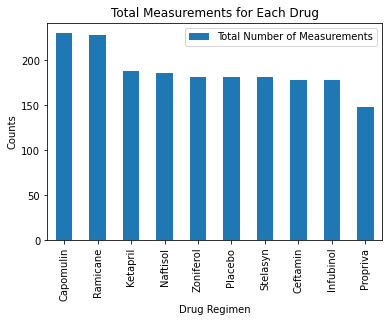

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Note: Direction above is ambiguous as it could mean each row, or each row and each column. 
#Plotting number of rows per drug.
#group by drug and count meaurements of Tumor Volume.
regimen_bar = mousemerge_clean.groupby("Drug Regimen")
regimen_bar_df = pd.DataFrame({"Total Number of Measurements": regimen_bar["Tumor Volume (mm3)"].count()}).sort_values(by = "Total Number of Measurements", ascending = False)
#plot bar chart of the counts by drug
regimen_bar_df.plot(y="Total Number of Measurements", ylabel="Counts", kind = 'bar', title = "Total Measurements for Each Drug")

Text(0.5, 1.0, 'Total Measurements for Each Drug')

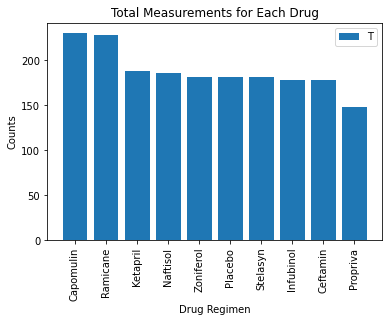

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Using list comprehension to obtain a list of counts for each drug.
bar_pyplot = [[drug, mousemerge_clean["Drug Regimen"].loc[mousemerge_clean["Drug Regimen"]==drug].count()] for drug in mousemerge_clean["Drug Regimen"].unique()]
# testing using lambda function to sort the data by counts in column 1 of the list.
bar_pyplot = sorted(bar_pyplot, key=lambda x: x[1], reverse = True)

#plot with labels and title.
plt.bar([bar_pyplot[i][0] for i in range(len(bar_pyplot))], [bar_pyplot[i][1] for i in range(len(bar_pyplot))])
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")
plt.legend("Total Number of Measurements")
plt.title("Total Measurements for Each Drug")

Text(0.5, 1.0, 'Distribution of Female versus Male Mice')

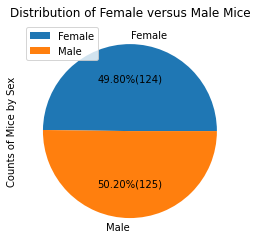

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Note: Counting mice by sex using the original dataframe, which includes the dropped mouse.
gender_pie = mouse_metadata.groupby("Sex")
gender_pie_df = pd.DataFrame({"Counts of Mice by Sex": gender_pie["Mouse ID"].count()})
gender_pie_df.plot(y="Counts of Mice by Sex", kind = 'pie',autopct=lambda p: '{:.2f}%({:.0f})'.format\
                   (p,(p/100)*sum(gender_pie_df["Counts of Mice by Sex"].tolist()))\
                  )
# code for autopct to display both counts and percents borrowed in part from https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct 
plt.legend(loc='upper left')
plt.title("Distribution of Female versus Male Mice")

Text(0.5, 1.0, 'Distribution of Female versus Male Mice')

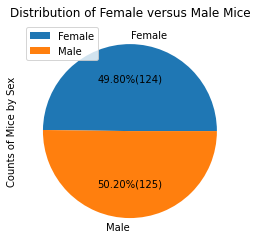

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#list comprehension to pull values by sex out of the dataframe.
pie_pyplot = [[sex, mouse_metadata["Sex"].loc[mouse_metadata["Sex"]==sex].count()] for sex in mouse_metadata["Sex"].unique()]
# Testing lambda functions to sort values.
pie_pyplot = sorted(pie_pyplot, key=lambda x: x[1], reverse = False)
#plot. Uses list comprehension to get values and labels out of the list above.
plt.pie([pie_pyplot[i][1] for i in range(len(pie_pyplot))], labels = [pie_pyplot[i][0] for i in range(len(pie_pyplot))],\
        autopct=lambda p: '{:.2f}%({:.0f})'.format\
                   (p,(p/100)*sum(gender_pie_df["Counts of Mice by Sex"].tolist()))\
                  )
plt.legend(loc='upper left')
plt.ylabel("Counts of Mice by Sex")
plt.title("Distribution of Female versus Male Mice")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_reg_vol = mouse_metadata[mouse_metadata["Drug Regimen"].isin(drug_list)]
# Start by getting the last (greatest) timepoint for each mouse
last_time_per_mouse = pd.DataFrame(study_results.groupby("Mouse ID")["Timepoint"].max())
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_obs = four_reg_vol.merge(last_time_per_mouse, how = "left", on = ["Mouse ID"])
# last_obs.sort_values(by="Timepoint")
last_obs_tumor = last_obs.merge(study_results, how = "left", on = ["Mouse ID","Timepoint"])
# use max of timepoint
Only_Full_45 = last_obs_tumor.loc[last_obs["Timepoint"]==45]
Only_Full_45
# NOTE: Instructions are ambigous as to whether to include mice who have final observations earlier than Timepoint = max
# max appears to be 45. Using filter to Timepoint = 45 (with Only_Full_45) shrinks new data set from 100 mice to 63 mice.
# NOTE: All remaining 63 mice have all 10 Timepoints of observations. 
# NOTE: Since no exclusion direction are given, proceeding with last_obs_tumor set which has 100 mice.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] # instructions unclear. Only using four regimens from above.

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_data = {}

for drug in drug_list:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    new_vol_data = last_obs_tumor[last_obs_tumor["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    #Add the name of the drug, and its list of associated Tumor Volume measurements to the dictionary
    # creates a dictionary of lists to make dataframe.
    Tumor_vol_data[drug] = new_vol_data.tolist()
    
    # Determine outliers using upper and lower bounds
    quartiles = new_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    #print statements
    print(f"for Drug: {drug}.")
    print(f"The lower quartile of Tumor Vol (mm3) is: {lowerq}")
    print(f"The upper quartile of Tumor Vol (mm3) is: {upperq}")
    print(f"The interquartile range of Tumor Vol (mm3) is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("Potential outliers:")
    print(last_obs_tumor.loc[(last_obs_tumor["Drug Regimen"]==drug)\
                             &((last_obs_tumor["Tumor Volume (mm3)"]<lower_bound)\
                               |(last_obs_tumor["Tumor Volume (mm3)"]>upper_bound))][["Mouse ID","Timepoint","Tumor Volume (mm3)"]])
    print("------------------------------------------------------")

for Drug: Capomulin.
The lower quartile of Tumor Vol (mm3) is: 32.37735684
The upper quartile of Tumor Vol (mm3) is: 40.1592203
The interquartile range of Tumor Vol (mm3) is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3)]
Index: []
------------------------------------------------------
for Drug: Ramicane.
The lower quartile of Tumor Vol (mm3) is: 31.56046955
The upper quartile of Tumor Vol (mm3) is: 40.65900627
The interquartile range of Tumor Vol (mm3) is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3)]
Index: []
------------------------------------------------------
for Drug: Infubinol.
The lower quartile of Tumor Vol (mm3) is: 54.04860769
The upper quartile of Tumor Vol (mm3) is: 65.5

In [16]:
#convert to dataframe
Tumor_vol_data_df=pd.DataFrame(Tumor_vol_data)
Tumor_vol_data_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [17]:
# trying the above with dictionary comprehension.
d_tvoldata = pd.DataFrame({d: last_obs_tumor[last_obs_tumor["Drug Regimen"]==d]["Tumor Volume (mm3)"].tolist() for d in drug_list})
d_tvoldata

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [18]:
#trying the above with df.pivot
df = last_obs_tumor
df
# create a column that indexes Tumor Volume by ordinal of appearance for the specific drug 
# (ie, third observation for Capomulin, output 2 [remember it starts at zero])
df["Obs Number"] = [df["Drug Regimen"][range(i)].tolist().count(df["Drug Regimen"].tolist()[i]) \
                    for i in range(len(df["Drug Regimen"]))]

df_piv = df.pivot(index="Obs Number",columns="Drug Regimen", values="Tumor Volume (mm3)")
df_piv

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Obs Number,,,,
0,23.343598,62.999356,67.973419,22.050126
1,28.484033,45.000000,65.525743,29.128472
2,28.430964,56.057749,57.031862,30.276232
3,30.485985,55.742829,66.083066,30.564625
4,31.023923,48.722078,72.226731,30.638696
5,31.896238,47.784682,36.321346,31.560470
6,32.377357,61.849023,60.969711,31.095335
7,33.329098,68.923185,62.435404,33.397653
8,34.455298,67.748662,60.918767,32.978522


Text(0.5, 1.0, 'Boxplot of Tumor Volume (mm3) for 4 Drug Regimens')

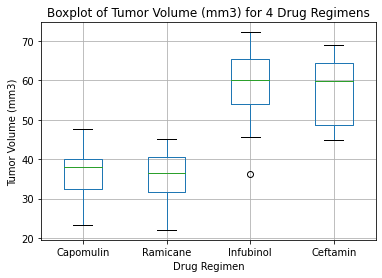

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_vol_data_df.boxplot()
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Boxplot of Tumor Volume (mm3) for 4 Drug Regimens')

## Line and Scatter Plots

<AxesSubplot:title={'center':'Tumor Volume Over Time for mouse w914.'}, xlabel='Timepoint', ylabel='mm3'>

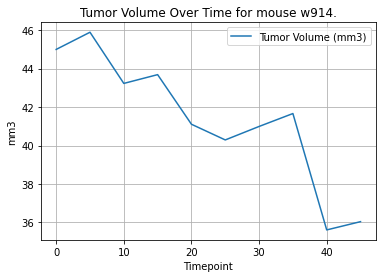

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Note: using dataset mousemerge_clean
from random import randint
#get a list of mice on the specific drug
mice_roster_capomulin = mousemerge_clean[(mousemerge_clean["Drug Regimen"]=="Capomulin")]["Mouse ID"].unique().tolist()
#randomly extract mouse id
rand_capomulin_mouse = mice_roster_capomulin[randint(0,len(mice_roster_capomulin)-1)]
#obtain data for mouse from mousemerge_clean
capomulin_mouse_linedata=mousemerge_clean[(mousemerge_clean["Drug Regimen"]=="Capomulin")&\
                                          (mousemerge_clean["Mouse ID"]==rand_capomulin_mouse)]
capomulin_mouse_linedata.plot(x="Timepoint", y="Tumor Volume (mm3)",ylabel="mm3",grid=True,\
                              title=f"Tumor Volume Over Time for mouse {rand_capomulin_mouse}.")

In [21]:
#display the datatable for above
capomulin_mouse_linedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
215,w914,Capomulin,Male,24,21,0,45.000000,0
216,w914,Capomulin,Male,24,21,5,45.893720,0
217,w914,Capomulin,Male,24,21,10,43.231963,0
218,w914,Capomulin,Male,24,21,15,43.688449,0
219,w914,Capomulin,Male,24,21,20,41.108092,0
220,w914,Capomulin,Male,24,21,25,40.291917,0
221,w914,Capomulin,Male,24,21,30,40.993110,0
222,w914,Capomulin,Male,24,21,35,41.664916,1
223,w914,Capomulin,Male,24,21,40,35.611309,2
224,w914,Capomulin,Male,24,21,45,36.041047,2


<AxesSubplot:title={'center':'Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen'}, xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

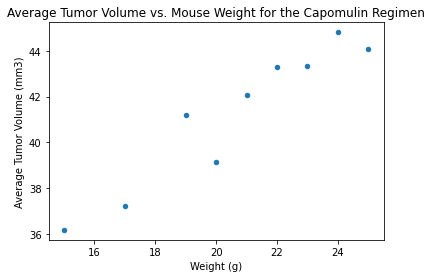

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_scatter = mousemerge_clean[(mousemerge_clean["Drug Regimen"]=="Capomulin")].groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
mouse_scatter_df = pd.DataFrame({"Weight (g)": mouse_scatter.index,
                   "Average Tumor Volume (mm3)": mouse_scatter})
mouse_scatter_df.plot.scatter(x="Weight (g)", y="Average Tumor Volume (mm3)", \
                              title = "Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")


## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

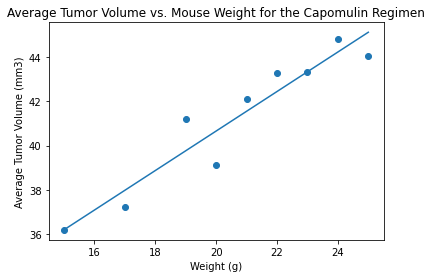

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
(slope, intercept, r, p, std_err) = linregress(mouse_scatter.index,mouse_scatter)

fig, ax1 = plt.subplots(1, sharex=True)
ax1.plot(mouse_scatter.index,slope*mouse_scatter.index+intercept)
ax1.scatter(x=mouse_scatter.index, y=mouse_scatter)
ax1.set_title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
ax1.set_xlabel("Weight (g)")
ax1.set_ylabel("Average Tumor Volume (mm3)")



In [24]:
correlation = st.pearsonr(mouse_scatter.index,mouse_scatter)
print(f"The equation for the line is y={round(slope,3)}*x+{round(intercept,3)} with an r^2 of {round(r**2,3)}.")
print(f"The correlation coefficient between Weight and Average Tumor Volume factors is {round(correlation[0],2)}")

The equation for the line is y=0.895*x+22.764 with an r^2 of 0.903.
The correlation coefficient between Weight and Average Tumor Volume factors is 0.95
